In [5]:
import numpy as np
from os import path
import xarray as xr

# from aicsimageio import AICSImage
# from aicspylibczi import CziFile
from matplotlib import pyplot as plt
from itertools import product

plt.rcParams["font.family"] = "sans-serif"
plt.style.use("../paper_style.mplstyle")
figwidth = 3.4

import pandas as pd
from skimage.io import imread
import yaml
from scipy.fft import dctn
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from basicpy.metrics import fourier_L0_norm


def save_and_copy_fig(fig, name):
    fig.savefig("../figs/" + name + ".pdf")
    !mkdir -p ~/myworks/papers/2305_BaSiCPy/fig2/
    !cp ../figs/{name}.pdf ~/myworks/papers/2305_BaSiCPy/fig2/

In [2]:
estimated_parameters_df = pd.read_csv(
    "wo_flatfield_estimated_parameters_df_with_autotune.csv", index_col=0
)

In [3]:
estimated_parameters_df

,true_flatfield_id,intensity,ave_count,n_images,blob_dist_key,rep,image_index,fitting_mode,smoothness_flatfield,time_gpu,time_cpu,deviation,entropy,fourier_L0_norm,autotune_cost
0,0,10,30,10,biased,0,0,ladmap,0.100000,12.788740,NaN,0.039185,2.035007,0.329701,11.926041
1,0,10,30,10,biased,0,0,ladmap,0.261016,1.134672,NaN,0.033143,2.041676,0.150249,6.549148
2,0,10,30,10,biased,0,0,ladmap,0.681292,0.936035,NaN,0.023936,2.054167,0.017933,2.592150
3,0,10,30,10,biased,0,0,ladmap,1.778279,0.949724,NaN,0.014436,2.068040,0.000249,2.075512
4,0,10,30,10,biased,0,0,ladmap,4.641589,1.035547,NaN,0.009749,2.081444,0.000000,2.081444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10075,3,1000,100,1000,unbiased,4,719,approximate,0.681292,2.088787,NaN,0.004025,7.205264,0.000934,7.233284
10076,3,1000,100,1000,unbiased,4,719,approximate,1.778279,2.317800,NaN,0.003350,7.205574,0.000000,7.205574
10077,3,1000,100,1000,unbiased,4,719,approximate,4.641589,2.083310,NaN,0.004422,7.206906,0.000000,7.206906
10078,3,1000,100,1000,unbiased,4,719,approximate,12.115277,2.316262,NaN,0.012073,7.210934,0.000000,7.210934


Text(0, 0.5, 'CPU time (s)')

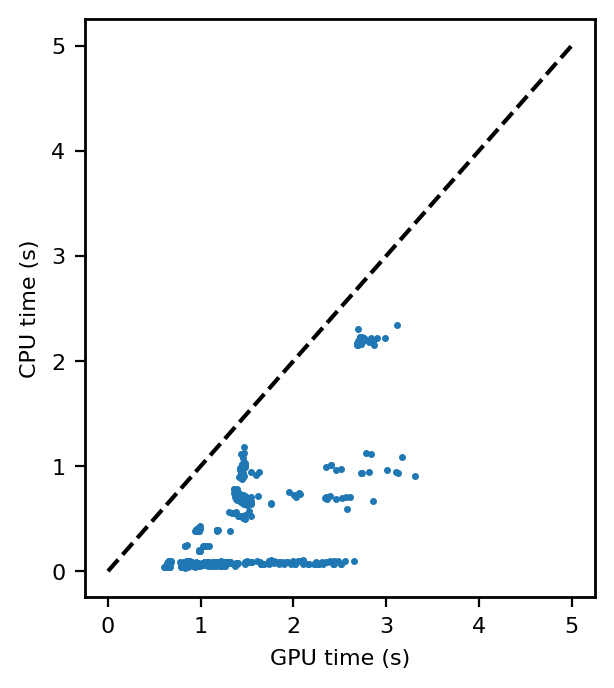

In [9]:
plt.plot(
    estimated_parameters_df["time_gpu"],
    estimated_parameters_df["time_cpu"],
    ".",
)
plt.plot([0, 5], [0, 5], "k--")
plt.xlabel("GPU time (s)")
plt.ylabel("CPU time (s)")

In [5]:
param_sets = [
    {"intensity": 10, "ave_count": 30, "blob_dist_key": "biased"},
    {"intensity": 1000, "ave_count": 100, "blob_dist_key": "unbiased"},
]


def format_str(v):
    if isinstance(v, str):
        return f"'{v}'"
    else:
        return v


for p in param_sets:
    _df = estimated_parameters_df.query(
        " and ".join([f"{k} == {format_str(v)}" for k, v in p.items()])
    )
    display(_df.head())
    print(_df["image_index"].unique()[[0, 1, 2]])
    for i in _df["image_index"].unique()[[0, 1, 2]]:
        !cp /Volumes/work/fukai/basicpy/BaSiCPy/misc_notebooks/analysis_for_publication/synthesized_data/wo_darkfield_imagess/{i}.npy ./wo_darkfield_imagess/

,true_flatfield_id,intensity,ave_count,n_images,blob_dist_key,rep,image_index,fitting_mode,smoothness_flatfield,time_gpu,time_cpu,deviation,entropy,fourier_L0_norm,autotune_cost
0,0,10,30,10,biased,0,0,ladmap,0.100000,12.788740,NaN,0.039185,2.035007,0.329701,11.926041
1,0,10,30,10,biased,0,0,ladmap,0.261016,1.134672,NaN,0.033143,2.041676,0.150249,6.549148
2,0,10,30,10,biased,0,0,ladmap,0.681292,0.936035,NaN,0.023936,2.054167,0.017933,2.592150
3,0,10,30,10,biased,0,0,ladmap,1.778279,0.949724,NaN,0.014436,2.068040,0.000249,2.075512
4,0,10,30,10,biased,0,0,ladmap,4.641589,1.035547,NaN,0.009749,2.081444,0.000000,2.081444


[0 1 2]
cp: cannot stat '/Volumes/work/fukai/basicpy/BaSiCPy/misc_notebooks/analysis_for_publication/synthesized_data/wo_darkfield_imagess/0.npy': No such file or directory
cp: cannot stat '/Volumes/work/fukai/basicpy/BaSiCPy/misc_notebooks/analysis_for_publication/synthesized_data/wo_darkfield_imagess/1.npy': No such file or directory
cp: cannot stat '/Volumes/work/fukai/basicpy/BaSiCPy/misc_notebooks/analysis_for_publication/synthesized_data/wo_darkfield_imagess/2.npy': No such file or directory


,true_flatfield_id,intensity,ave_count,n_images,blob_dist_key,rep,image_index,fitting_mode,smoothness_flatfield,time_gpu,time_cpu,deviation,entropy,fourier_L0_norm,autotune_cost
2170,0,1000,100,10,unbiased,0,155,ladmap,0.100000,2.436040,0.067086,0.061279,7.058469,0.288481,15.712890
2171,0,1000,100,10,unbiased,0,155,ladmap,0.261016,0.852592,0.053382,0.056326,7.064915,0.085554,9.631540
2172,0,1000,100,10,unbiased,0,155,ladmap,0.681292,0.654380,0.063617,0.047587,7.070879,0.014757,7.513594
2173,0,1000,100,10,unbiased,0,155,ladmap,1.778279,0.838849,0.045504,0.034258,7.081802,0.000872,7.107954
2174,0,1000,100,10,unbiased,0,155,ladmap,4.641589,0.818795,0.042120,0.024511,7.098500,0.000062,7.100368


[155 156 157]
cp: cannot stat '/Volumes/work/fukai/basicpy/BaSiCPy/misc_notebooks/analysis_for_publication/synthesized_data/wo_darkfield_imagess/155.npy': No such file or directory
cp: cannot stat '/Volumes/work/fukai/basicpy/BaSiCPy/misc_notebooks/analysis_for_publication/synthesized_data/wo_darkfield_imagess/156.npy': No such file or directory
cp: cannot stat '/Volumes/work/fukai/basicpy/BaSiCPy/misc_notebooks/analysis_for_publication/synthesized_data/wo_darkfield_imagess/157.npy': No such file or directory


In [6]:
name_map = {
    "intensity": "Int.",
    "ave_count": "Count",
    "blob_dist_key": "Dist.",
    "n_images": "# Img.",
}

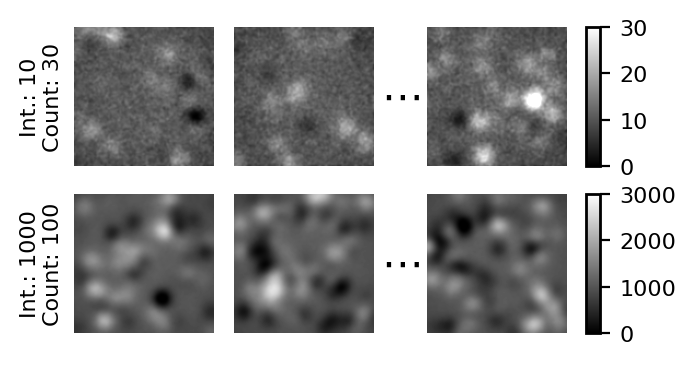

In [20]:
fig, axes = plt.subplots(
    2, 5, width_ratios=(1, 1, 0.1, 1, 0.1), figsize=(figwidth, figwidth / 2)
)
for p, _axes in zip(param_sets, axes):
    _df = estimated_parameters_df.query(
        " and ".join([f"{k} == {format_str(v)}" for k, v in p.items()])
    )
    i = _df["image_index"].unique()[0]
    im = np.load(f"./wo_darkfield_imagess/{i}.npy")
    for _im, _ax in zip(im, [_axes[0], _axes[1], _axes[3]]):
        mappable = _ax.imshow(_im, cmap="gray", vmin=0.0, vmax=p["intensity"] * 3.0)
    fig.colorbar(mappable, cax=_axes[4])
    _axes[0].set_ylabel(
        "\n".join([f"{name_map[k]}: {v}" for k, v in p.items() if k != "blob_dist_key"])
    )
for ax in axes[:, :-1].ravel():
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
for ax in axes[:, 2].ravel():
    ax.axis("off")
    ax.text(
        0.5,
        0.5,
        "$\cdots$",
        transform=ax.transAxes,
        ha="center",
        va="center",
        fontsize=15,
    )
fig.subplots_adjust(left=0.1, right=0.875, top=0.95, bottom=0.05)
save_and_copy_fig(fig, "fig2d_synthesized_data_examples")

In [21]:
flatfiled_profiles = np.load("flatfield_profiles.npy")

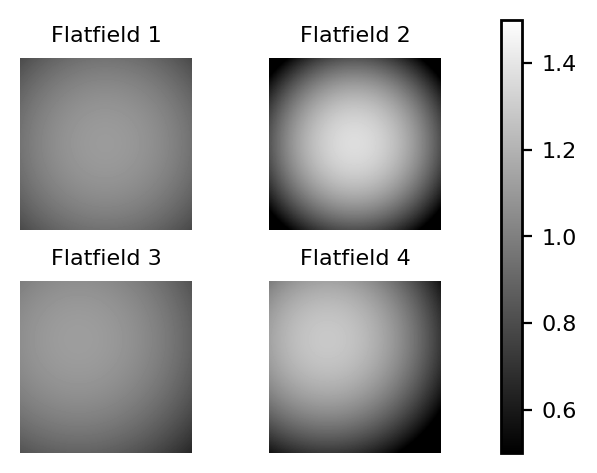

In [22]:
fig, axes = plt.subplots(
    2,
    2,
    width_ratios=(1, 1),
    figsize=(figwidth, figwidth * 0.75),
    subplot_kw={"aspect": "equal"},
    gridspec_kw={"hspace": 0.3, "wspace": 0.1},
)

for jj, (ax, flatfiled_profile) in enumerate(zip(axes.ravel(), flatfiled_profiles)):
    mappable = ax.imshow(flatfiled_profile, cmap="gray", vmin=0.5, vmax=1.5)
    ax.set_title(f"Flatfield {jj+1}")

for ax in axes[:, :].ravel():
    ax.set_xticks([])
    ax.set_yticks([])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)
fig.colorbar(mappable, ax=axes.ravel().tolist())


fig.subplots_adjust(left=0.05, right=0.75, top=0.875, bottom=0.1)
save_and_copy_fig(fig, "figS_flatfield_profiles")

In [23]:
estimated_parameters_df.keys()

Index(['true_flatfield_id', 'intensity', 'ave_count', 'n_images',
       'blob_dist_key', 'rep', 'image_index', 'fitting_mode',
       'smoothness_flatfield', 'time_gpu', 'time_cpu', 'deviation', 'entropy',
       'fourier_L0_norm', 'autotune_cost'],
      dtype='object')

In [24]:
image_properties = ["intensity", "ave_count", "blob_dist_key", "n_images"]
fitting_parameters = [
    "fitting_mode",
    "rep",
    "smoothness_flatfield",
    "true_flatfield_id",
]

estimated_parameters_xr = xr.Dataset.from_dataframe(
    estimated_parameters_df.query("fitting_mode=='ladmap'").set_index(
        image_properties + fitting_parameters
    )
)
estimated_parameters_xr

<xarray.Dataset>
Dimensions:               (intensity: 3, ave_count: 2, blob_dist_key: 2,
                           n_images: 3, fitting_mode: 1, rep: 5,
                           smoothness_flatfield: 7, true_flatfield_id: 4)
Coordinates:
  * intensity             (intensity) int64 10 100 1000
  * ave_count             (ave_count) int64 30 100
  * blob_dist_key         (blob_dist_key) object 'biased' 'unbiased'
  * n_images              (n_images) int64 10 100 1000
  * fitting_mode          (fitting_mode) object 'ladmap'
  * rep                   (rep) int64 0 1 2 3 4
  * smoothness_flatfield  (smoothness_flatfield) float64 0.1 0.261 ... 31.62
  * true_flatfield_id     (true_flatfield_id) int64 0 1 2 3
Data variables:
    image_index           (intensity, ave_count, blob_dist_key, n_images, fitting_mode, rep, smoothness_flatfield, true_flatfield_id) int64 ...
    time_gpu              (intensity, ave_count, blob_dist_key, n_images, fitting_mode, rep, smoothness_flatfield, true_flatfield_id) float64 ...
    time_cpu              (intensity, ave_count, blob_dist_key, n_images, fitting_mode, rep, smoothness_flatfield, true_flatfield_id) float64 ...
    deviation             (intensity, ave_count, blob_dist_key, n_images, fitting_mode, rep, smoothness_flatfield, true_flatfield_id) float64 ...
    entropy               (intensity, ave_count, blob_dist_key, n_images, fitting_mode, rep, smoothness_flatfield, true_flatfield_id) float64 ...
    fourier_L0_norm       (intensity, ave_count, blob_dist_key, n_images, fitting_mode, rep, smoothness_flatfield, true_flatfield_id) float64 ...
    autotune_cost         (intensity, ave_count, blob_dist_key, n_images, fitting_mode, rep, smoothness_flatfield, true_flatfield_id) float64 ...

In [25]:
figwidth

3.4

In [26]:
sample_keys = ["rep", "true_flatfield_id", "blob_dist_key"]
x_key = "smoothness_flatfield"
col_keys = ["intensity", "ave_count"]
row_keys = list(
    set(image_properties + fitting_parameters)
    - set(sample_keys)
    - set([x_key])
    - set(col_keys)
)
print(row_keys)
ncols = np.prod([len(estimated_parameters_xr.coords[k]) for k in col_keys])
nrows = np.prod([len(estimated_parameters_xr.coords[k]) for k in row_keys])
print(ncols, nrows)

['n_images', 'fitting_mode']
6 3


Cost with different smoothness_flatfield and autotune costs

In [29]:
row_keys

['n_images', 'fitting_mode']

In [30]:
col_keys

['intensity', 'ave_count']

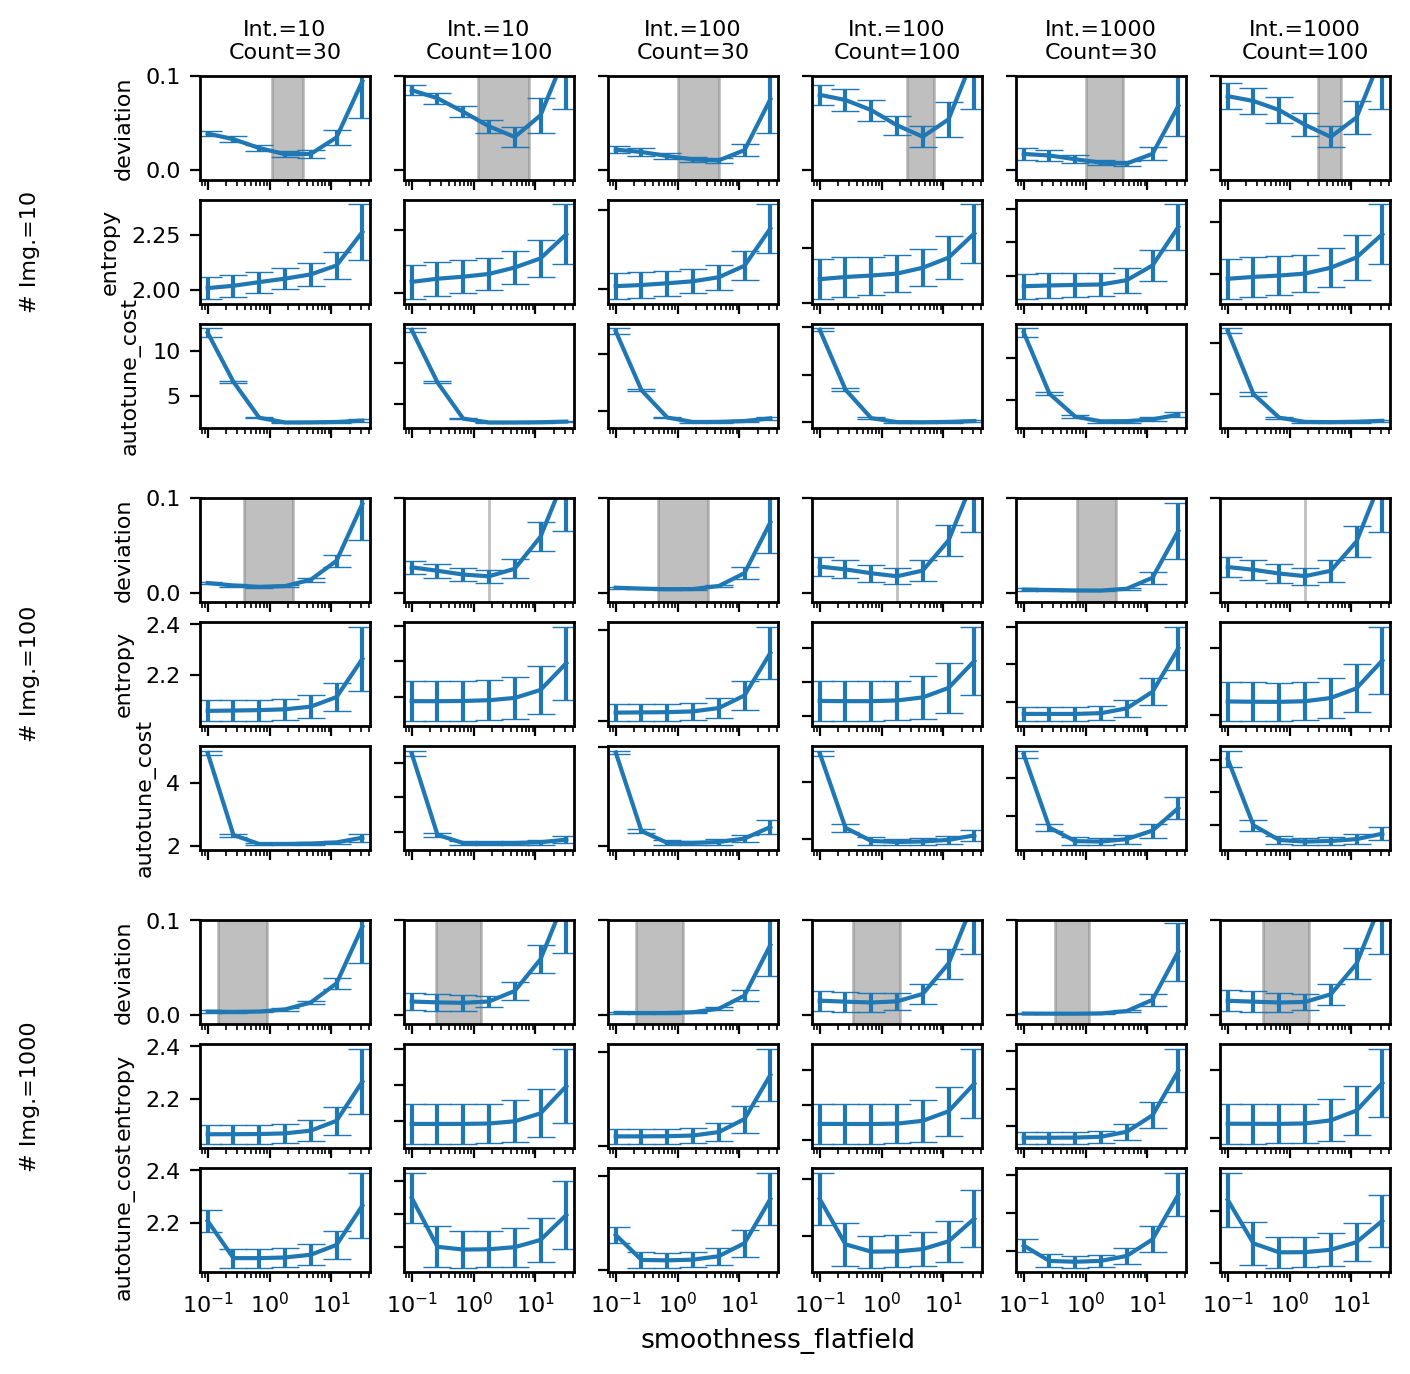

In [40]:
fig, axes = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(figwidth * 2, figwidth * 4 / ncols * nrows),
    # gridspec_kw={"hspace": 1.5, "wspace": 1.0},
    dpi=100,
)
val_keys = ["deviation", "entropy", "autotune_cost"]
row_coords = list(
    product(*[estimated_parameters_xr.coords[c].to_numpy() for c in row_keys])
)
col_coords = list(
    product(*[estimated_parameters_xr.coords[c].to_numpy() for c in col_keys])
)
for jj, (row_coord, row_axes) in enumerate(zip(row_coords, axes)):
    ds = estimated_parameters_xr.sel(**dict(zip(row_keys, row_coord)))
    minmaxes = [(ds[k].min(), ds[k].max()) for k in val_keys]
    for kk, (col_coord, ax) in enumerate(zip(col_coords, row_axes)):
        ds = estimated_parameters_xr.sel(
            **dict(zip(row_keys, row_coord)), **dict(zip(col_keys, col_coord))
        )
        ds = ds.sortby(x_key)
        xs = ds.coords[x_key].to_numpy()
        mean_dims = set(ds.dims) - set([x_key])

        divider = make_axes_locatable(ax)
        ax3 = ax
        ax2 = divider.append_axes("top", size="100%", pad=0.1)
        ax1 = divider.append_axes("top", size="100%", pad=0.1)
        ax1.set_ylim([-0.01, 0.1])
        #        ax2.set_ylim([-0.1, 0.8])
        #        ax3.set_ylim([-0.1, 0.8])
        for k, minmax, _ax in zip(val_keys, minmaxes, [ax1, ax2, ax3]):
            ys = ds[k].mean(dim=mean_dims).to_numpy()
            yerrs = ds[k].std(dim=mean_dims).to_numpy()
            _ax.errorbar(xs, ys, yerr=yerrs, label=k)
            # _ax.set_ylim(minmax)
            _ax.set_xscale("log")
            if kk != 0:
                _ax.set_yticklabels([])
            else:
                _ax.set_ylabel(k)
            if jj != nrows - 1:
                _ax.set_xticklabels([])
        if jj == 0:
            title = "\n".join(
                [f"{name_map[k]}={v}" for k, v in zip(col_keys, col_coord)]
            )
            ax1.set_title(title)
        else:
            ax1.set_xticklabels([])
            ax2.set_xticklabels([])
        if kk == 0:
            title = "\n".join(
                [
                    f"{name_map[k]}={v}"
                    for k, v in zip(row_keys, row_coord)
                    if k != "fitting_mode"
                ]
            )
            ax2.text(
                -1.0,
                0.5,
                title,
                transform=ax2.transAxes,
                ha="center",
                va="center",
                rotation=90,
            )

        sample_coords = list(product(*[ds.coords[c].to_numpy() for c in sample_keys]))
        xvals = []
        for c in sample_coords:
            _ds = ds.sel(**dict(zip(sample_keys, c)))
            min_index = (
                _ds.autotune_cost.argmin().item()
            )  # Using .item() to extract the scalar value
            # Get the corresponding value of smoothness_flatfield
            min_xval = _ds.coords[x_key][min_index].item()
            xvals.append(min_xval)
        xvals = np.array(xvals)
        m = np.mean(np.log(xvals))
        s = np.std(np.log(xvals))
        ax1.fill_betweenx(
            [-0.01, 0.1], np.exp(m - 2 * s), np.exp(m + 2 * s), color="gray", alpha=0.5
        )

fig.supxlabel("smoothness_flatfield")
fig.subplots_adjust(left=0.075, right=0.95, top=0.95, bottom=0.07)
# fig.supylabel("Deviation")
save_and_copy_fig(fig, "figS_synthesized_data_all")

In [32]:
param_sets2 = [
    # {"n_images":10, "intensity": 1000, "ave_count": 30,},
    {
        "n_images": 10,
        "intensity": 10,
        "ave_count": 100,
    },
    {"n_images": 1000, "intensity": 1000, "ave_count": 30},
]

In [33]:
val_keys

['deviation', 'entropy', 'autotune_cost']

/var/folders/81/kh0zpmbd00g39vwz69lkk4mc0000gn/T/ipykernel_19714/3677354100.py:98: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(vals)


0.0196056868975144
0.0075044541804806
0.003459555722187


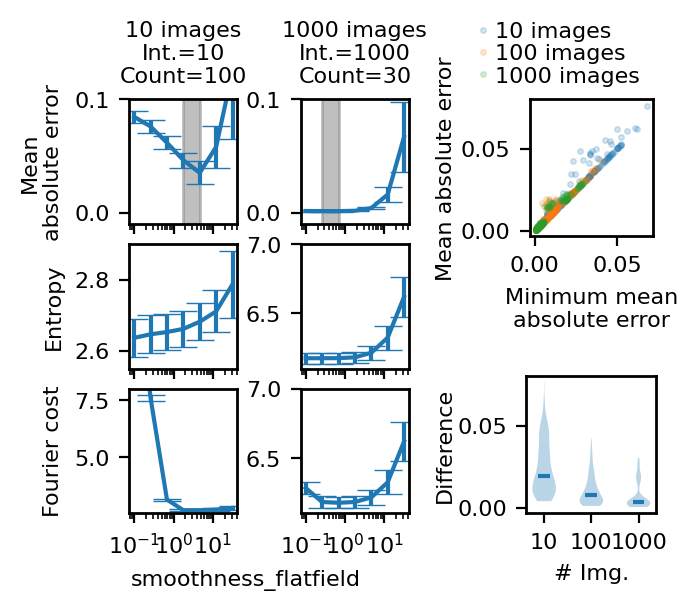

In [76]:
used_xr = estimated_parameters_xr

fig, axes = plt.subplots(
    1,
    5,
    figsize=(figwidth, figwidth / 1.15),
    width_ratios=(1, 0.25, 1, 0.75, 1.2),
)
axes[1].axis("off")
for jj, (ax, p) in enumerate(zip(axes[[0, 2]], param_sets2)):
    ds = used_xr.sel(**p)
    ds = ds.sortby(x_key)
    xs = ds.coords[x_key].to_numpy()
    mean_dims = set(ds.dims) - set([x_key])

    divider = make_axes_locatable(ax)
    ax3 = ax
    ax2 = divider.append_axes("top", size="100%", pad=0.1)
    ax1 = divider.append_axes("top", size="100%", pad=0.1)
    ax1.set_ylim([-0.01, 0.1])
    ax2.set_ylim([[2.55, 2.9], [6.1, 7]][jj])
    ax3.set_ylim([[2.55, 8], [6.1, 7]][jj])
    for k, _ax in zip(val_keys, [ax1, ax2, ax3]):
        ys = ds[k].mean(dim=mean_dims).to_numpy()
        yerrs = ds[k].std(dim=mean_dims).to_numpy()
        _ax.errorbar(xs, ys, yerr=yerrs, label=k)
        # _ax.set_ylim(minmax)
        _ax.set_xscale("log")

    title = "\n".join(
        [
            f"{name_map[k]}={v}" if k != "n_images" else f"{v} images"
            for k, v in p.items()
        ]
    )
    ax1.set_title(title)
    ax1.set_xticklabels([])
    ax2.set_xticklabels([])
    # if jj != 0:
    # ax1.set_yticklabels([])
    # ax2.set_yticklabels([])
    # ax3.set_yticklabels([])

    sample_coords = list(product(*[ds.coords[c].to_numpy() for c in sample_keys]))
    xvals = []
    for c in sample_coords:
        _ds = ds.sel(**dict(zip(sample_keys, c)))
        min_index = (
            _ds.autotune_cost.argmin().item()
        )  # Using .item() to extract the scalar value
        # Get the corresponding value of smoothness_flatfield
        min_xval = _ds.coords[x_key][min_index].item()
        xvals.append(min_xval)
    xvals = np.array(xvals)
    # print(xvals)
    m = np.mean(np.log(xvals))
    s = np.std(np.log(xvals))
    ax1.fill_betweenx(
        [-0.01, 0.1],
        np.min(xvals),
        np.max(xvals),
        # np.exp(m - s), np.exp(m + s),
        color="gray",
        alpha=0.5,
    )
    if jj == 0:
        ax1.set_ylabel("Mean\nabsolute error")
        ax2.set_ylabel("Entropy")
        ax3.set_ylabel("Fourier cost")
        ax3.set_xlabel("smoothness_flatfield", x=1.075)

axes[-2].axis("off")

ax2 = axes[-1]
divider = make_axes_locatable(ax2)
ax_scatter = divider.append_axes("top", size="100%", pad=0.7)

deviations = []
min_deviations = []
vals = [10, 100, 1000]
for val in vals:
    ds = used_xr.sel(n_images=val)
    min_keys = list(set(ds.dims) - set(["smoothness_flatfield"]))
    df = ds.to_dataframe()
    grps = df.groupby(level=min_keys)
    idxs = grps["autotune_cost"].idxmin()
    min_deviation = grps["deviation"].min()
    df = df.loc[idxs]
    index = set(df.index.names) & set(min_deviation.index.names)
    df2 = pd.merge(df, min_deviation, on=list(index), suffixes=("", "_min"))
    #    df2["deviation_diff"] = df2["deviation"] - df2["deviation_min"]
    deviations.append(df2["deviation"].to_numpy())
    min_deviations.append(df2["deviation_min"].to_numpy())
# ax_hist.set_ylabel("")
for d, md, n_images in zip(min_deviations, deviations, vals):
    ax_scatter.plot(d, md, ".", alpha=0.2, label=f"{n_images} images")
ax_scatter.legend(loc="lower right", bbox_to_anchor=(1.0, 1.0), labelspacing=0.1)

ax_scatter.set_aspect("equal")
ax_scatter.set_xlabel("Minimum mean\nabsolute error")
ax_scatter.set_ylabel("Mean absolute error", x=0.5)
ax_scatter.yaxis.set_label_coords(-0.6, 0.5)
ax2.violinplot(deviations, showmedians=True, showextrema=False)
ax2.set_xticklabels(vals)
ax2.set_xticks([1, 2, 3])
ax2.set_xlabel("# Img.")
ax2.set_ylabel("Difference", x=0.5)
ax2.yaxis.set_label_coords(-0.55, 0.5)
fig.subplots_adjust(left=0.175, right=0.95, top=0.85, bottom=0.15)
save_and_copy_fig(fig, "fig2e_synthesized_data_results")

for d in deviations:
    print(np.median(d))

In [71]:
xvals = np.array(
    "4.64158883 4.64158883 1.77827941 4.64158883 1.77827941 1.77827941\
 1.77827941 4.64158883 1.77827941 4.64158883 4.64158883 1.77827941\
 4.64158883 4.64158883 1.77827941 1.77827941 4.64158883 4.64158883\
 1.77827941 4.64158883 1.77827941 4.64158883 1.77827941 4.64158883\
 1.77827941 4.64158883 4.64158883 4.64158883 1.77827941 4.64158883\
 1.77827941 1.77827941 4.64158883 1.77827941 4.64158883 1.77827941\
 4.64158883 4.64158883 4.64158883 4.64158883".split()
).astype(float)

In [74]:
m = np.mean(np.log(xvals))
s = np.std(np.log(xvals))
np.exp(m - s), np.exp(m + s)

(1.9213526512823123, 4.960889827943536)

In [ ]:
min_deviation.reset_index().set_index(df.index)

fitting_mode  \
intensity ave_count blob_dist_key fitting_mode rep smoothness_flatfield true_flatfield_id                
10        30        biased        ladmap       0   0.261016             0                       ladmap   
100       30        biased        ladmap       0   0.681292             0                       ladmap   
1000      30        biased        ladmap       0   0.681292             0                       ladmap   
10        30        biased        ladmap       0   0.261016             1                       ladmap   
100       30        biased        ladmap       0   0.681292             1                       ladmap   
...                                                                                                ...   
          100       unbiased      ladmap       4   0.681292             2                       ladmap   
1000      100       unbiased      ladmap       4   0.681292             2                       ladmap   
10        100       unbiased      ladmap       4   0.261016             3                       ladmap   
100       100       unbiased      ladmap       4   0.681292             3                       ladmap   
1000      100       unbiased      ladmap       4   0.681292             3                       ladmap   

                                                                                           rep  \
intensity ave_count blob_dist_key fitting_mode rep smoothness_flatfield true_flatfield_id        
10        30        biased        ladmap       0   0.261016             0                    0   
100       30        biased        ladmap       0   0.681292             0                    0   
1000      30        biased        ladmap       0   0.681292             0                    0   
10        30        biased        ladmap       0   0.261016             1                    0   
100       30        biased        ladmap       0   0.681292             1                    0   
...                                                                                        ...   
          100       unbiased      ladmap       4   0.681292             2                    4   
1000      100       unbiased      ladmap       4   0.681292             2                    4   
10        100       unbiased      ladmap       4   0.261016             3                    4   
100       100       unbiased      ladmap       4   0.681292             3                    4   
1000      100       unbiased      ladmap       4   0.681292             3                    4   

                                                                                           ave_count  \
intensity ave_count blob_dist_key fitting_mode rep smoothness_flatfield true_flatfield_id              
10        30        biased        ladmap       0   0.261016             0                         30   
100       30        biased        ladmap       0   0.681292             0                         30   
1000      30        biased        ladmap       0   0.681292             0                         30   
10        30        biased        ladmap       0   0.261016             1                         30   
100       30        biased        ladmap       0   0.681292             1                         30   
...                                                                                              ...   
          100       unbiased      ladmap       4   0.681292             2                        100   
1000      100       unbiased      ladmap       4   0.681292             2                        100   
10        100       unbiased      ladmap       4   0.261016             3                        100   
100       100       unbiased      ladmap       4   0.681292             3                        100   
1000      100       unbiased      ladmap       4   0.681292             3                        100   

                                                                                   